In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from skimage import io
from skimage.color import rgb2gray

In [5]:
def distance(a,b):
  return np.abs(a-b)

def region_growing(img, img_g, thresh, seed):
  x=seed[0]
  y=seed[1]
  img_g[x,y]=1
  [rows,cols]=img.shape

  #calculate the region mean
  px=img[x,y]
  if (y+1<cols and img_g[x,y+1]==0 and distance(px,img[x,y+1]) <=thresh):
    region_growing(img,img_g,thresh,[x,y+1])
  if (y-1>=0 and img_g[x,y-1]==0 and distance(px,img[x,y-1]) <=thresh):
    region_growing(img,img_g,thresh,[x,y-1])
  if (x+1<rows and img_g[x+1,y]==0 and distance(px,img[x+1,y]) <=thresh):
    region_growing(img,img_g,thresh,[x+1,y])
  if (x-1>=0 and img_g[x-1,y]==0 and distance(px,img[x-1,y]) <=thresh):
    region_growing(img,img_g,thresh,[x-1,y])

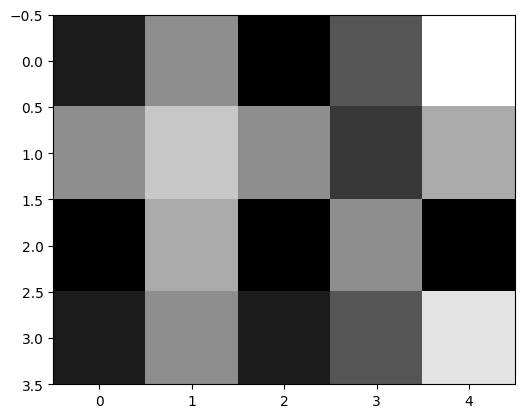

In [26]:
image=np.array([[1,5,0,3,9],[5,7,5,2,6],[0,6,0,5,0],[1,5,1,3,8]],dtype=int)
plt.imshow(image,cmap='gray')

mx = np.max(np.max(image))

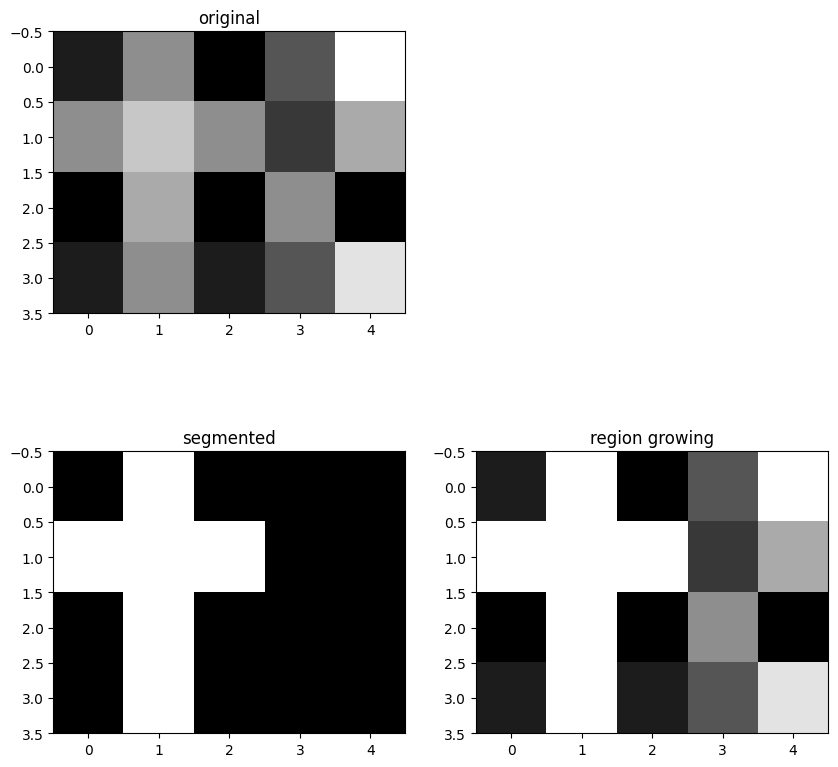

In [14]:
img_seg = np.zeros(image.shape)

region_growing(image,img_seg, 2, [1, 1])

img_modi = image.copy()

for r in range(4):
  for c in range (5):
    if img_seg[r,c]==1:
      img_modi[r,c]=mx

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title('original')
plt.imshow(image, cmap = 'gray')

plt.subplot(2, 2, 3)
plt.title('segmented')
plt.imshow(img_seg, cmap = 'gray')

plt.subplot(2, 2, 4)
plt.title('region growing')
plt.imshow(img_modi, cmap = 'gray')

plt.show()

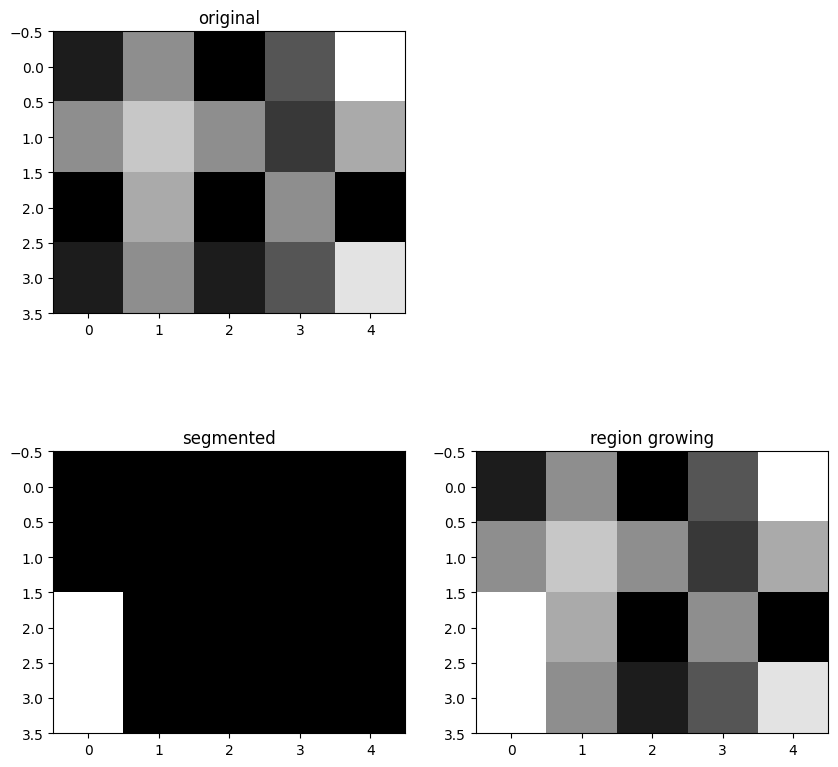

In [18]:
# new seed
img_seg = np.zeros(image.shape)

region_growing(image,img_seg, 2, [3, 0])

img_modi = image.copy()

for r in range(4):
  for c in range (5):
    if img_seg[r,c]==1:
      img_modi[r,c]=mx

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title('original')
plt.imshow(image, cmap = 'gray')

plt.subplot(2, 2, 3)
plt.title('segmented')
plt.imshow(img_seg, cmap = 'gray')

plt.subplot(2, 2, 4)
plt.title('region growing')
plt.imshow(img_modi, cmap = 'gray')

plt.show()

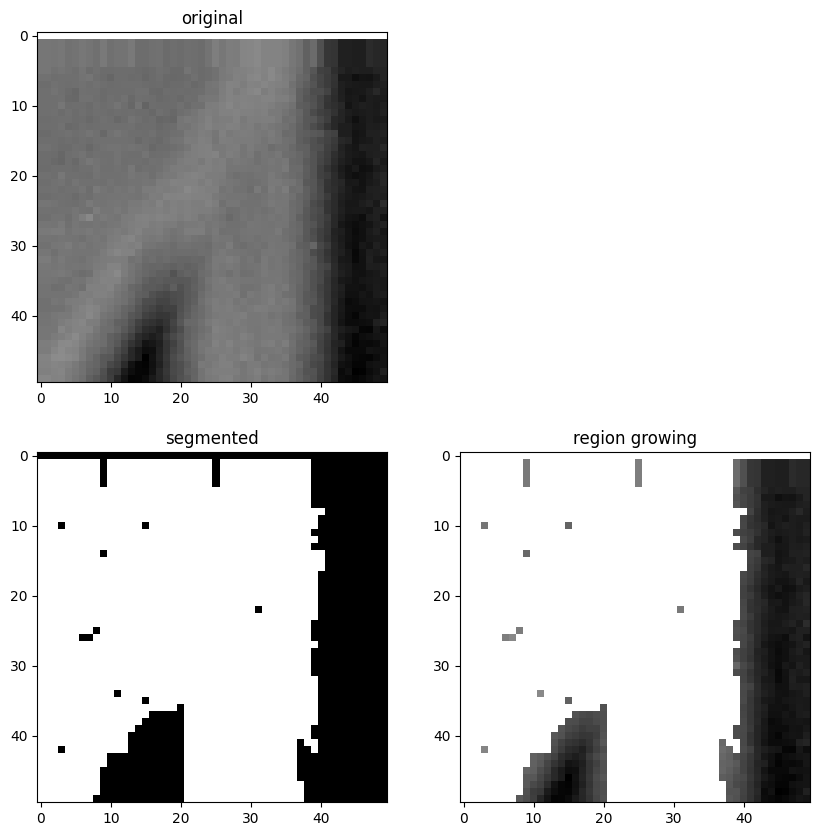

In [24]:
image=io.imread('lena.png')
image=255*rgb2gray(image)
image=image[0:50, 0:50]

mx=int(np.max(np.max(image)))

[rows, cols] = image.shape
img_seg=np.zeros(image.shape)

seed=[5,10]
thresh=5

region_growing(image, img_seg, thresh, seed)
img_seg = img_seg*255

img_modi = image.copy()

for r in range(rows):
  for c in range (cols):
    if img_seg[r,c] == 255:
      img_modi[r,c] = mx

plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.title('original')
plt.imshow(image, cmap = 'gray')

plt.subplot(2, 2, 3)
plt.title('segmented')
plt.imshow(img_seg, cmap = 'gray')

plt.subplot(2, 2, 4)
plt.title('region growing')
plt.imshow(img_modi, cmap = 'gray')

plt.show()